In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv(r'C:\Users\jyots\Downloads\Projects\Projects\healthcare-stroke\healthcare-dataset-stroke-data.csv')

In [3]:
df1.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
df1.shape

(5110, 12)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df1.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df1.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df1['bmi'].fillna(int(df1['bmi'].mean()),inplace=True)

In [9]:
df1.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
categorial=[var for var in df1.columns if df1[var].dtype=='O']

print('they are {} categorial variable\n'.format(len(categorial)))

print('the categorial variable are:\n\n',categorial)

they are 5 categorial variable

the categorial variable are:

 ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [12]:
df1[categorial].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [13]:
for var in categorial:
    print(df1[var].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [14]:
for var in categorial:
    
    print(var, ' contains ', len(df1[var].unique()),' labels')

gender  contains  3  labels
ever_married  contains  2  labels
work_type  contains  5  labels
Residence_type  contains  2  labels
smoking_status  contains  4  labels


In [15]:
numerical=[var for var in df1.columns if df1[var].dtype!='O']

print('they are {} categorial variable\n'.format(len(numerical)))

print('the categorial variable are:\n\n',numerical)

they are 7 categorial variable

the categorial variable are:

 ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [16]:
df1[numerical].head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,28.0,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


In [17]:
df1.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

In [18]:
df1[numerical].isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

In [19]:
cat = ['gender','ever_married','Residence_type','smoking_status','work_type']
for i in cat:
    dummy = pd.get_dummies(df1[i],drop_first=True,prefix=f"{i}_")
    data = pd.concat([df1,dummy],axis=1)

In [20]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type__Never_worked,work_type__Private,work_type__Self-employed,work_type__children
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1,0,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1,0,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,1,0


In [21]:
data = data.drop([*cat,'id'],axis=1)

In [22]:
X = data.drop('stroke',axis=1).values
y = data['stroke'].values

In [23]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [24]:
x_train.shape,x_test.shape

((3577, 9), (1533, 9))

In [25]:
data.columns
colums=['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'work_type__1', 'work_type__2', 'work_type__3',
       'work_type__4']

In [26]:
from sklearn.tree import DecisionTreeClassifier

clf_gini =DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) 

clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [27]:
y_pred_gini = clf_gini.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9498


In [29]:
print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.9522
Test set score: 0.9498


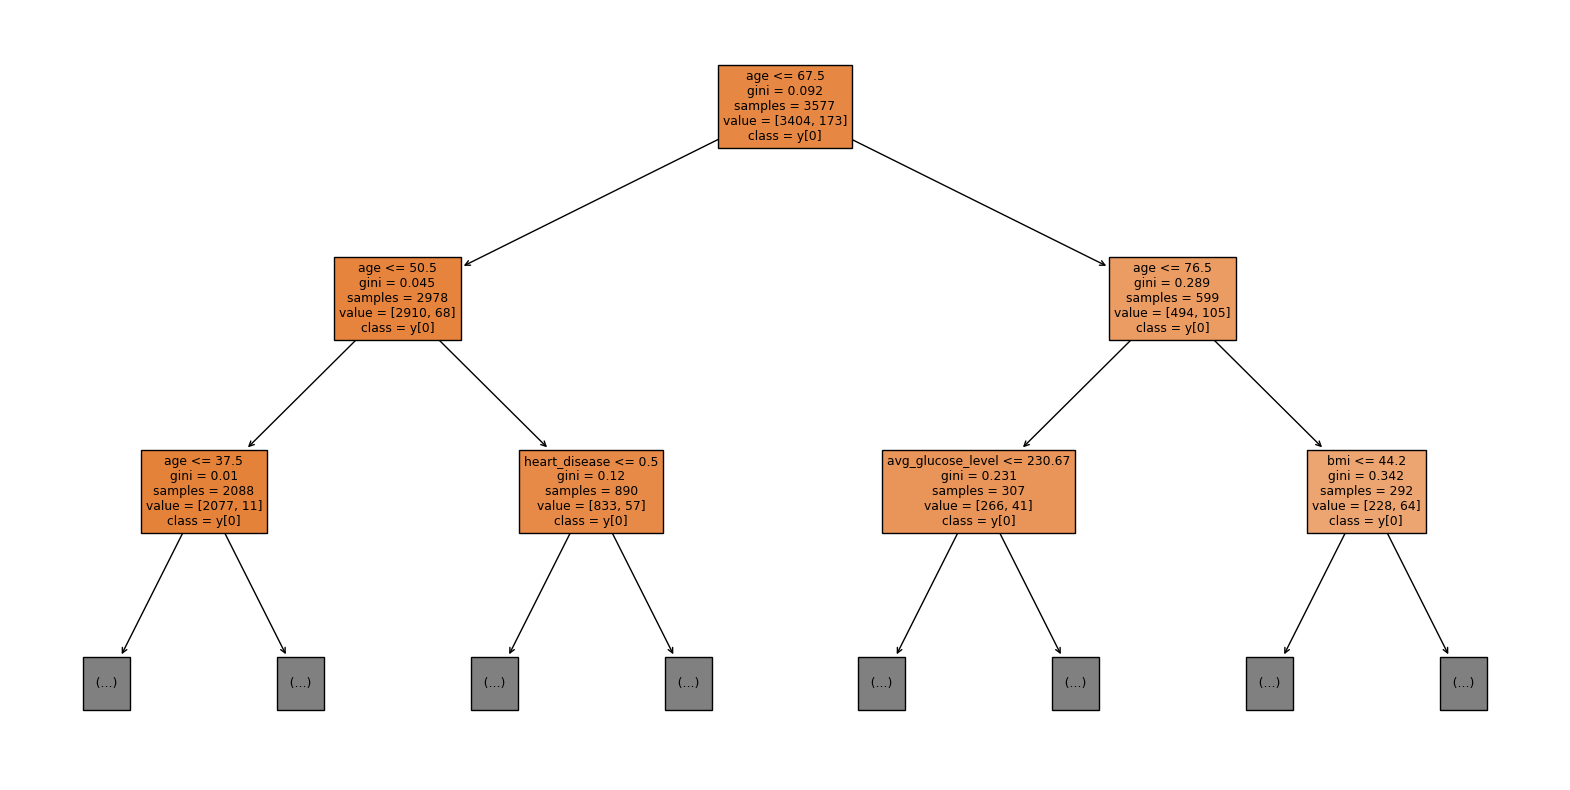

In [30]:
import matplotlib.pyplot as plt
from sklearn.tree import *
plt.figure(figsize=(20,10))
plot_tree(clf_gini,feature_names=data.drop('stroke',axis=1).columns,max_depth = 2,filled=True,class_names = True)
plt.show()

In [33]:
df1.rename(columns=str.title,inplace=True)
df1.head()

,Id,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Bmi,Smoking_Status,Stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


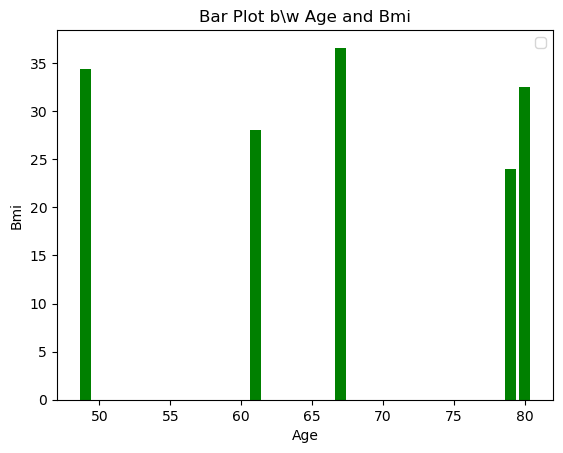

In [34]:
x=df1['Age'].head()
y=df1['Bmi'].head()
plt.bar(x,y,color='green')
plt.xlabel('Age')
plt.ylabel('Bmi')
plt.title('Bar Plot b\w Age and Bmi')
plt.legend()
plt.show()

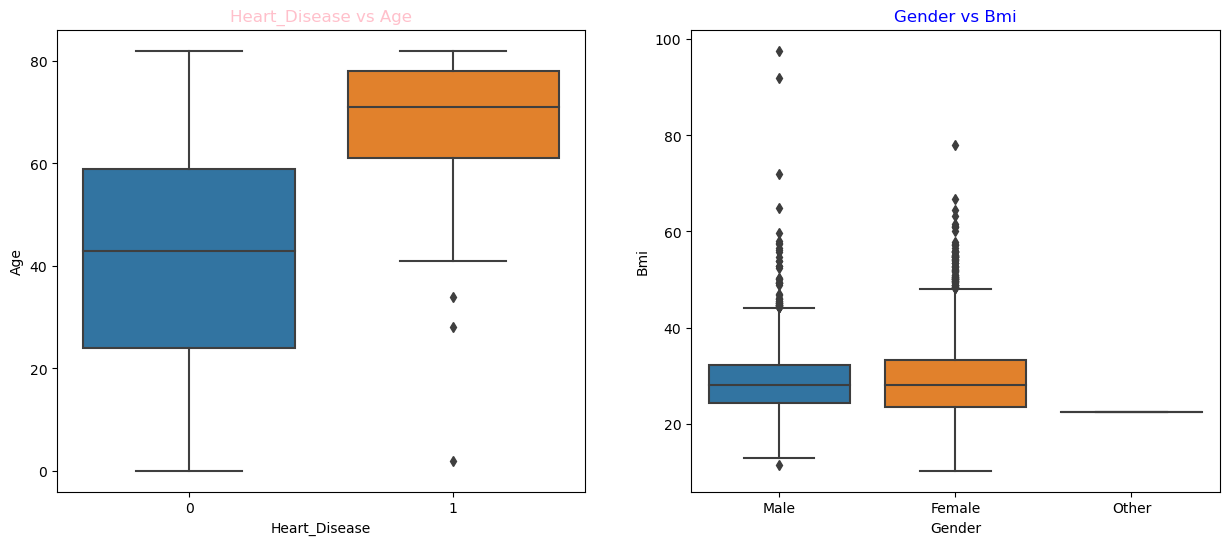

In [35]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.boxplot(y='Age',data=df1,x='Heart_Disease',ax=axes[0])
axes[0].set_title('Heart_Disease vs Age',color='pink')
sns.boxplot(y='Bmi',data=df1,x='Gender',ax=axes[1])
axes[1].set_title('Gender vs Bmi',color='blue')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


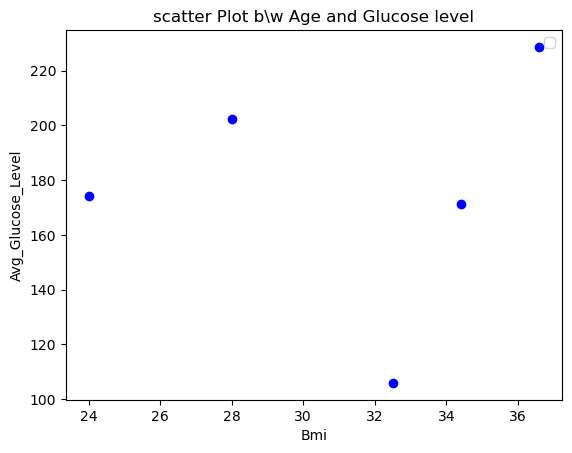

In [36]:
x=df1['Bmi'].head()
y=df1['Avg_Glucose_Level'].head()
plt.scatter(x,y,color='blue')
plt.xlabel('Bmi')
plt.ylabel('Avg_Glucose_Level')
plt.title('scatter Plot b\w Age and Glucose level')
plt.legend()
plt.show()

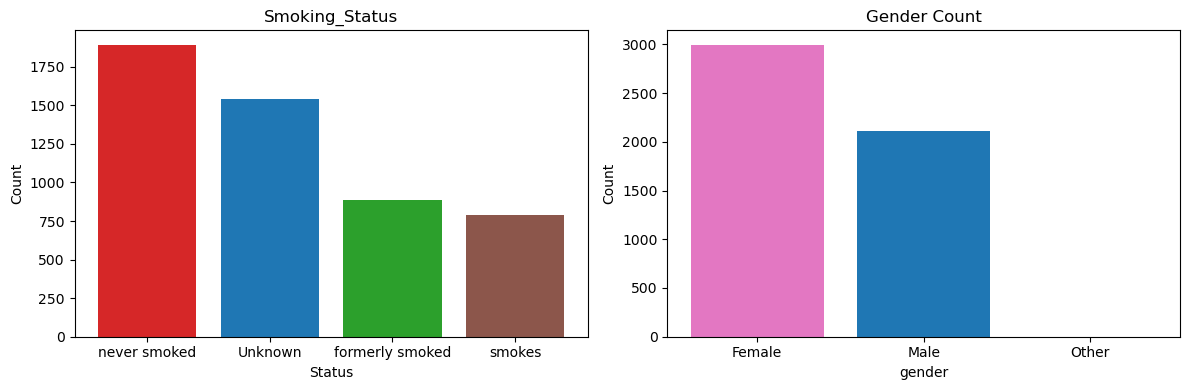

In [37]:
fig,ax=plt.subplots(ncols=2, nrows=1,figsize=(12,4))
smoking_status=df1['Smoking_Status'].value_counts().index
counts=df1['Smoking_Status'].value_counts().values
ax[0].bar(smoking_status,counts,color=['tab:red','tab:blue','tab:green','tab:brown'])
ax[0].set_title("Smoking_Status")
ax[0].set_xlabel("Status")
ax[0].set_ylabel("Count")

gender=df1['Gender'].value_counts().index
gender_count=df1['Gender'].value_counts().values
ax[1].bar(gender,gender_count,color=['tab:pink','tab:blue','tab:green'])
ax[1].set_title("Gender Count")
ax[1].set_xlabel("gender")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


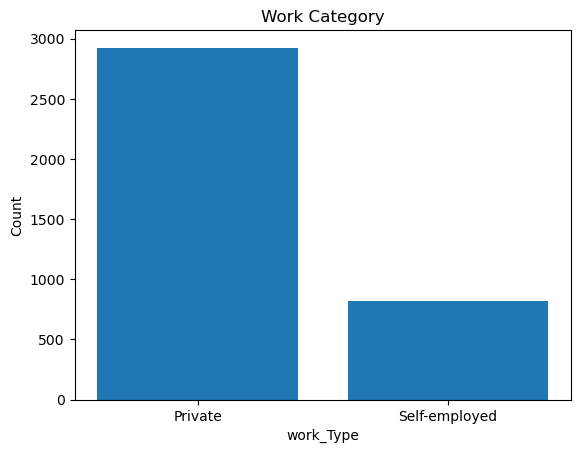

In [38]:
fig,ax=plt.subplots()

work_type=df1['Work_Type'].value_counts()[:2].index
work_counts=df1['Work_Type'].value_counts()[:2].values
ax.bar(work_type,work_counts)
ax.set_xlabel('work_Type')
ax.set_ylabel('Count')
ax.set_title('Work Category')

plt.show()

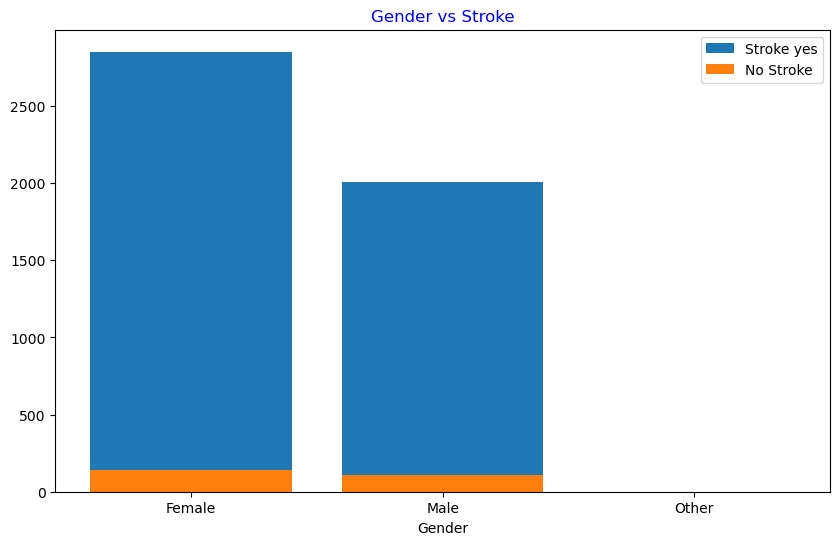

In [39]:
fig=plt.figure(figsize=(10,6))
ct=pd.crosstab(index=df1['Gender'],columns=df1['Stroke'])
plt.bar(ct.index,ct[0],label='Stroke yes')
plt.bar(ct.index,ct[1],label='No Stroke')
plt.xlabel('Gender')
plt.title('Gender vs Stroke',color='blue')

plt.legend()
plt.show()